# Проект по теме - Определяющие успешность игры закономерности.

# Содержание
1. [Загрузка данных](#start)
2. [Подготовка данных](#EDA)<br>
3. [Исследовательский анализ данных](#analysis)<br>
4. [Портрет пользователя каждого региона](#claster)<br>   
5. [Проверка гипотез](#check)<br>
6. [Общий вывод](#final)<br>

<b> Описание проекта </b> <br>
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>

Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и необходимо спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».<br>


<b> Описание данных </b> <br>
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB

<a id="start"></a>
### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
pth1 = '/datasets/games.csv'
pth2 = 'C:/Users/Olga/Desktop/Проект Компьютерные игры//games.csv' 

if os.path.exists(pth1):
    games = pd.read_csv(pth1)
elif os.path.exists(pth2):
    games = pd.read_csv(pth2)
else:
    print('Something is wrong')  

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="EDA"></a>
### Подготовка данных

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


In [6]:
# Приведем название столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [7]:
# Удалим пропуски в столбцах name, year_of_release, genre, т.к. их немного и их удаление не исказит анализ.
games.dropna(subset=['name', 'year_of_release', 'genre'], inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
# Столцец year_of_release приведем к типу int
games['year_of_release'] = games['year_of_release'].astype('int64')

In [9]:
# Посмотрим на уникальные значения столца user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
# В столбце user_score есть рейтинг, который неопределен, заменим его на nan и приведем к типу float
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

In [11]:
# Рассчитаем итоговые продажи по всем регионам
games['total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [12]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [13]:
games['rating'].fillna('Unknow', inplace = True)

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total            16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Осталось много пропусков в столбцах rating, critic_score, user_score. Удалить или заменить их не можем, так как данные могут пригодиться для дальнейшего анализа. Пропуски могут быть связаны с тем, что игры новые, поэтому не имеют оценки пользователей и критиков.  

In [15]:
games.duplicated().sum()

0

Явных дублиикатов в датасете нет, поэтому можно переходить к исследовательскому анализу.

<a id="analysis"></a>
### Исследовательский анализ данных

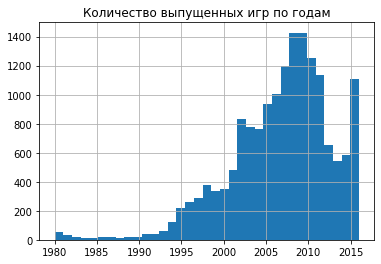

In [17]:
# Построим гистрограмму количетсва выпущенных игр по годам
games['year_of_release'].hist(bins=35)
plt.title('Количество выпущенных игр по годам')
plt.show()

 В период с 1994г начирается рост игр. На период с 2005 - 2010 приходится 

Так как до 1994г количество выпущенных игр мало и рост начинается с 1994г, то возьмем для анализа только донные начиная с него.

In [18]:
# Создадим сводную таблицу сумм прожаж по платформам
platforms = games.query('year_of_release >= 1994').pivot_table(index = 'platform', values = 'total', aggfunc = 'sum')\
.sort_values(by='total', ascending = False)\
.reset_index().iloc[0:10]
platforms

,platform,total
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


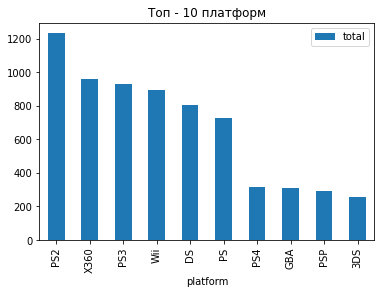

In [19]:
# Построим график Топ 10 платформ по продажам
platforms.plot(x = 'platform', y = 'total', kind = 'bar')
plt.title('Топ - 10 платформ')
plt.show()

In [20]:
# Сохраним название Топ платформ в список
top_platforms_list = platforms['platform'].unique()

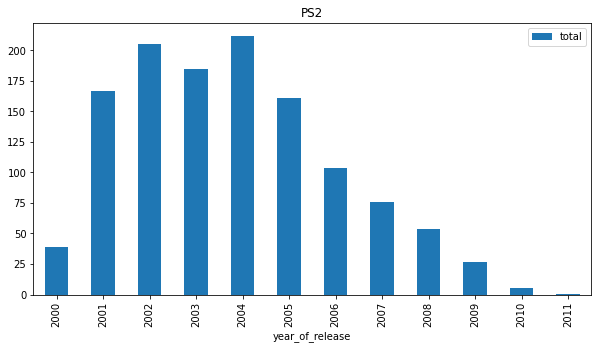

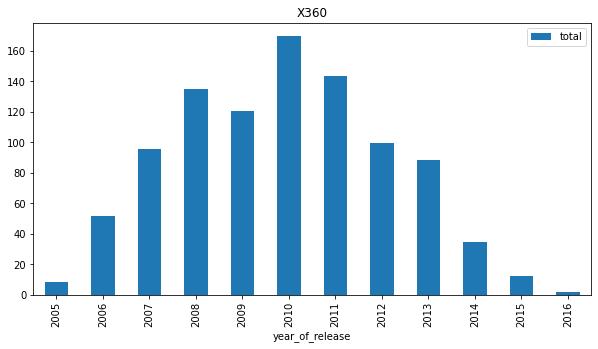

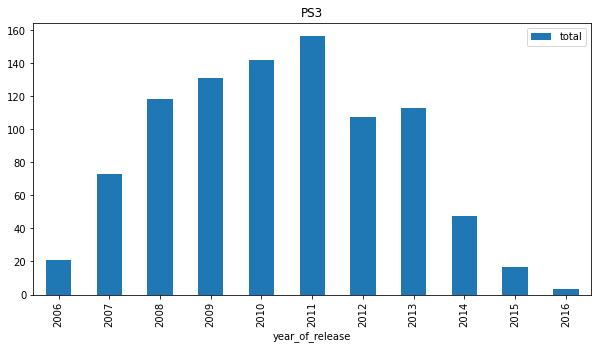

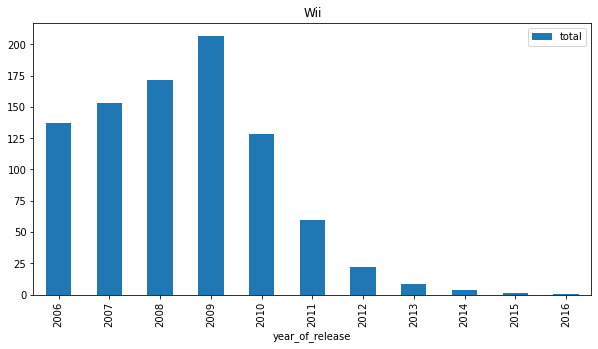

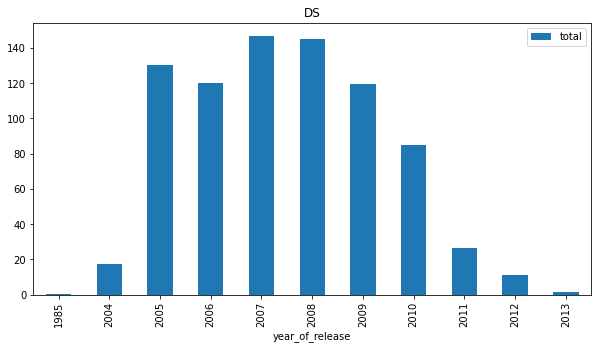

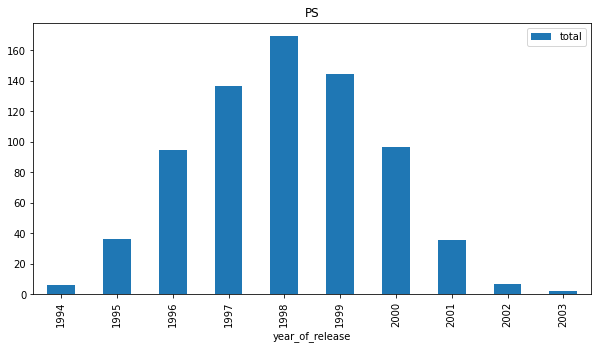

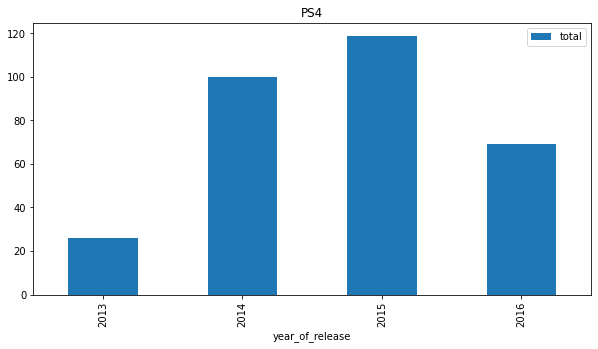

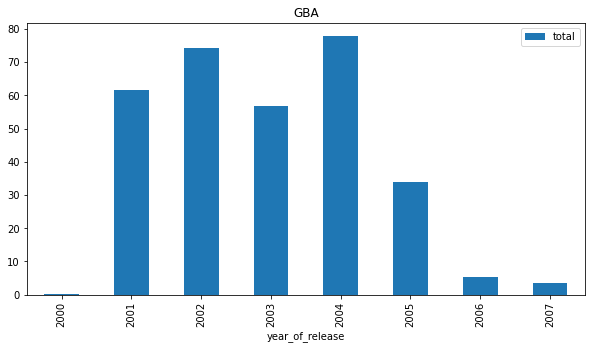

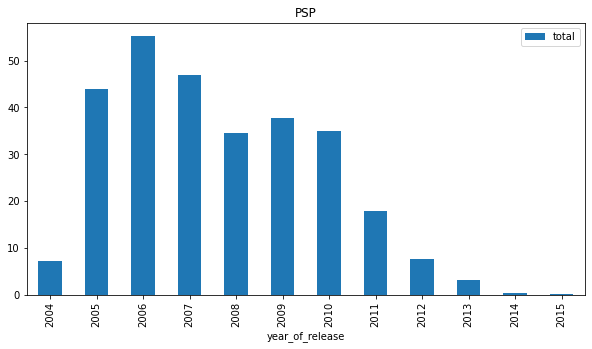

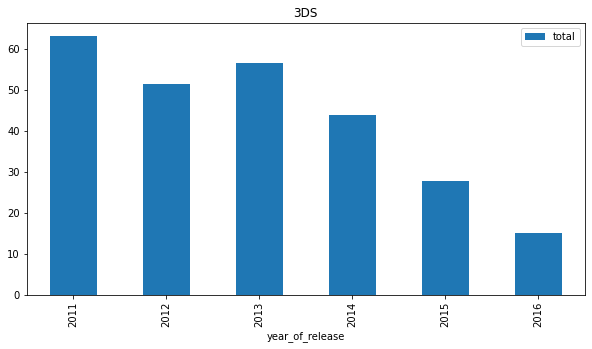

In [21]:
# Для каждой платформы из Топ-10 построим график прибыли по годам
for platform in top_platforms_list:
    games[games['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total', aggfunc = 'sum')\
    .plot(kind = 'bar', figsize=(10,5))
    plt.title(platform)    

По графикам видим, что средний срок существоания платфорт 10 лет. Чем больше выборка, тем точнее результат, но в данном случае возмем для анализа 3 года, так как индустрия игр быстро меняется и более ранние данные могут быть неактуальны и исказить резуьтаты исследования.

In [22]:
# Отфильтруем д актуальный период
actual_period = games.query('year_of_release >= 2013')
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknow,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknow,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknow,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknow,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknow,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknow,0.01


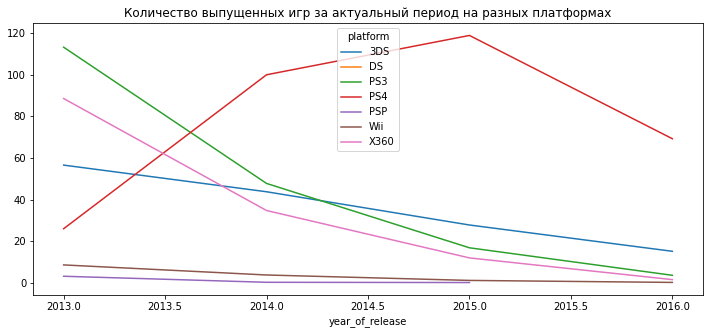

In [23]:
actual_period.query('platform in @top_platforms_list')\
.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total', aggfunc = 'sum').plot(figsize=(12,5))
plt.title('Количество выпущенных игр за актуальный период на разных платформах')
plt.show()

Из графика видим, что  для всех платформ характерно снижение по продажам. 
К потенциально прибыльным платформам можно отнести PS4, т.к. продается лучше других, но возможноэто связано с тем, что консоль появилась не так давно. И, возможно, 3DS, хоть прибыль и падает, но не так резко, как у других.
Приыбль с продажи консолей X360, PS3 падает сильнее всего. 

In [24]:
actual_period.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


In [25]:
actual_period_norm = actual_period[actual_period['total'] <= 1.4]

Text(0, 0.5, 'Глобальные продажи')

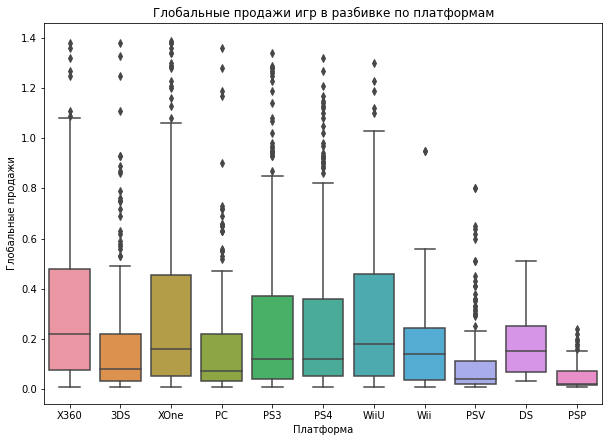

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(data=actual_period_norm, x='platform', y='total')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

- Из графиков видно, что медиана протекает у всех по разному.
- Больше всех продаж у X360, XOne, PS3, WiiU, а у PSV и PSP дела совсем не очень.

In [27]:
# Для анализа продаж в зависимости от отзывов пользователей и критиков выберу потенциально прибыльную платформу PS4
#print("Диаграмма рассеяния для PS4")
#sns.pairplot(games[games.platform == "PS4"][['total', 'critic_score', 'user_score']])
#plt.show()

Оставим 5 платформ для сравнения продаж на разных платформах.

In [28]:
top_5 = actual_period.query('platform in @top_platforms_list')['platform'].unique()[:5]

In [29]:
# Функция для построения диаграммы рассеяния
def platform_matrix(name_of_platform):
    platform = actual_period[actual_period['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(10,5))
    sns.scatterplot(x='user_score', y='total', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()

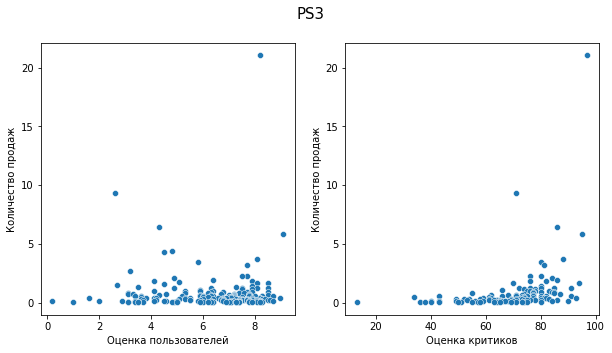

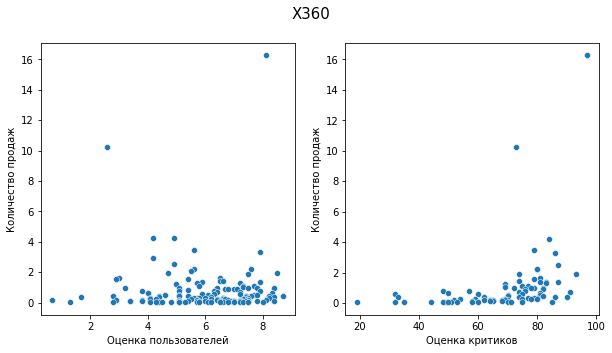

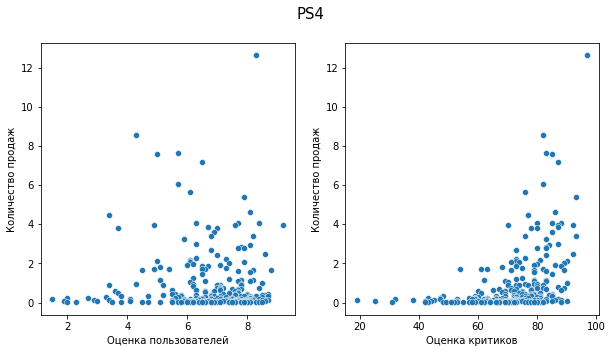

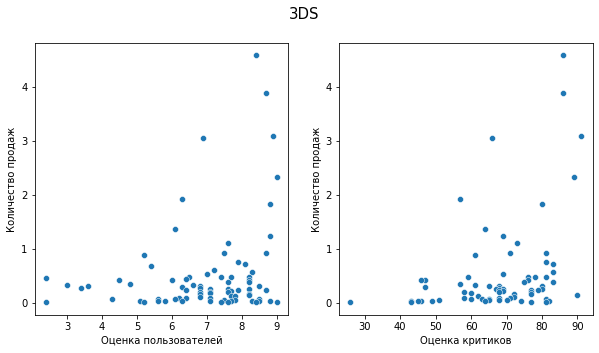

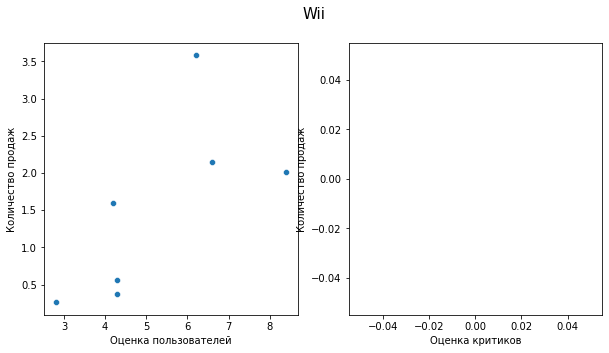

In [30]:
# Посмотрим на корреляцию между отзывами и продажами
for platform in top_5:
    platform_matrix(platform)

In [31]:
for i in top_5:
    print('Платформа', i)
    print(actual_period[actual_period.platform == i][['total', 'critic_score', 'user_score']].corr())
    print(' ')

Платформа PS3
                 total  critic_score  user_score
total         1.000000      0.334285    0.002394
critic_score  0.334285      1.000000    0.599920
user_score    0.002394      0.599920    1.000000
 
Платформа X360
                 total  critic_score  user_score
total         1.000000      0.350345   -0.011742
critic_score  0.350345      1.000000    0.520946
user_score   -0.011742      0.520946    1.000000
 
Платформа PS4
                 total  critic_score  user_score
total         1.000000      0.406568   -0.031957
critic_score  0.406568      1.000000    0.557654
user_score   -0.031957      0.557654    1.000000
 
Платформа 3DS
                 total  critic_score  user_score
total         1.000000      0.357057    0.241504
critic_score  0.357057      1.000000    0.769536
user_score    0.241504      0.769536    1.000000
 
Платформа Wii
                 total  critic_score  user_score
total         1.000000           NaN    0.682942
critic_score       NaN           NaN   

Из диаграмм рассеяния и корреляции между отзывами и продажами платформы PS4 и других платформ видим, что между оценкой критиков и продажами еще есть небольшая коррекляция, тогда как между отзывами пользователей и продажами ее почти нет или она слабая. исключение платформа Wii, где нет отзывов критиков, а зависимость между отзывами пользователей и продажами наблюдается на уровне 0.68

In [32]:
top_genre = actual_period.pivot_table(index = 'genre', values = 'total', aggfunc = 'median')\
.sort_values(ascending=False, by = 'total').reset_index()
top_genre

,genre,total
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


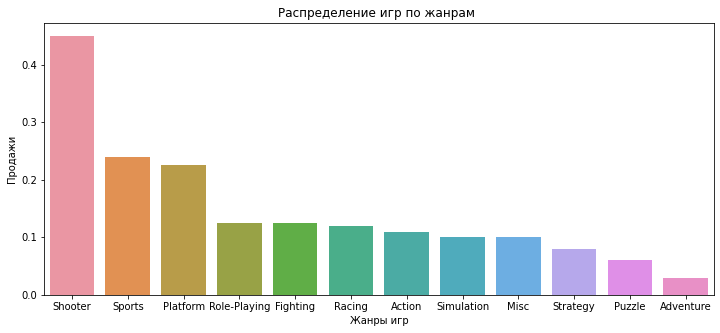

In [33]:
plt.figure(figsize=(12,5))
plt.title('Распределение игр по жанрам ')
sns.barplot(data=top_genre, x='genre', y='total')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')
plt.show()

Из сводной таблицы и круговой диаграммы видно, что самый прибыльный жанр - Shooter, далее идут Sports и Platform, а менее прибыльные  - Puzzle, Adventure.

<a id="claster"></a>
### Портрет пользователя каждого региона

In [34]:
# Функция для создания графиков топ-5 в регионе 
def top_in_regions(groupby, region_sales, ax):
    
    title_reg = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_reg = {'na_sales': 'teal', 'eu_sales': 'gray', 'jp_sales': 'darkblue'}
    plot = actual_period.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5] \
    .plot(kind='bar', title=title_reg[region_sales], ax=axes[ax], \
          fontsize=20, color=color_reg[region_sales], rot=20)
    plot.legend(prop={'size':15})
    plot.title.set_size(20)

Cамые популярные платформы (топ-5)


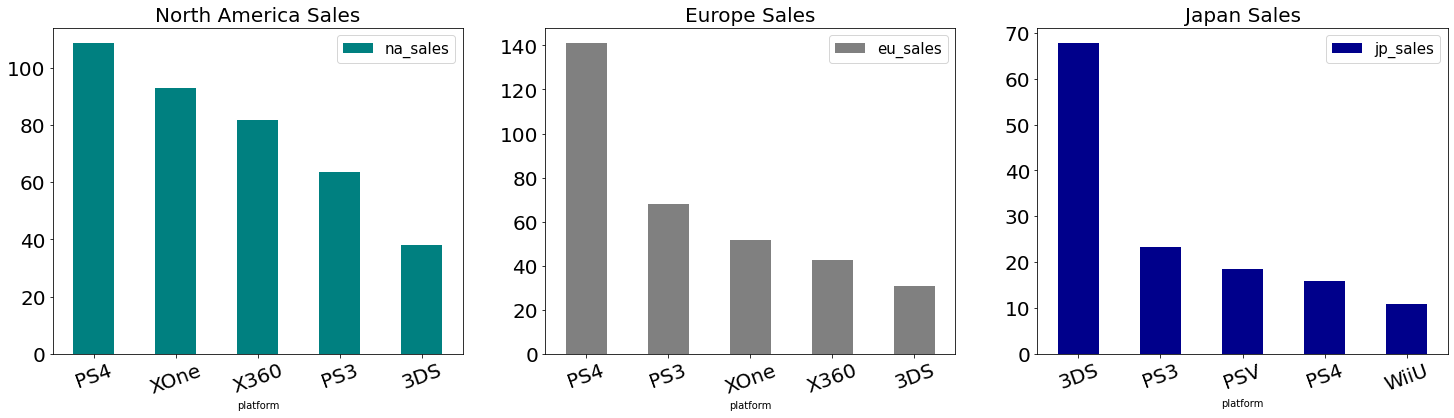

In [35]:
print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions('platform', 'na_sales', 0)
top_in_regions('platform', 'eu_sales', 1)
top_in_regions('platform', 'jp_sales', 2)

В Северной Америке популярны приставки PS4 и XOne. В Европе лидирующее место занимает PS4. В Японии лидер 3DS. 

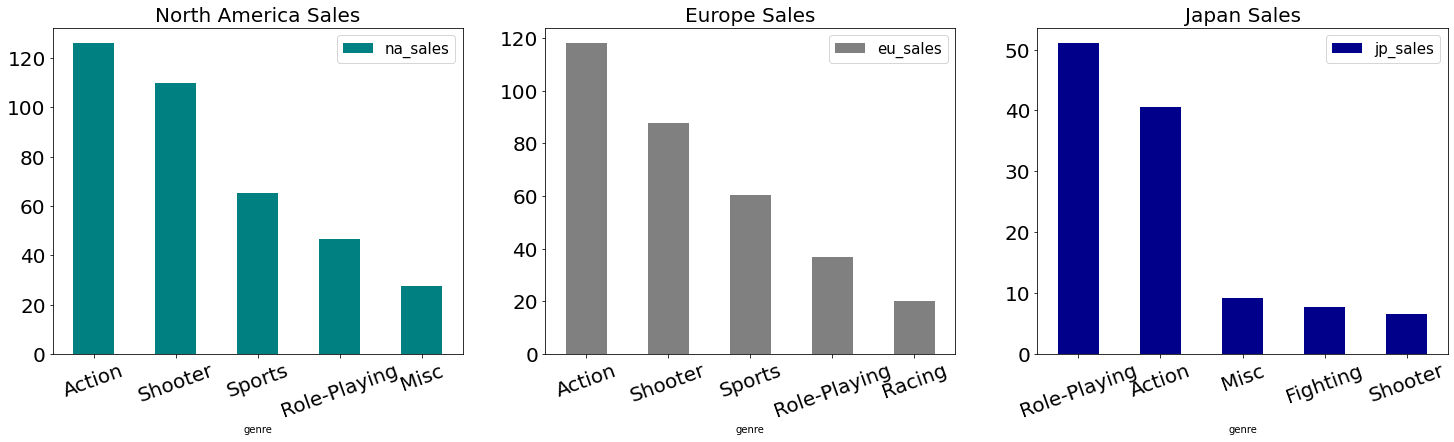

In [36]:
# Определим наиболее популярные жанры в заданных регионах
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions('genre', 'na_sales', 0)
top_in_regions('genre', 'eu_sales', 1)
top_in_regions('genre', 'jp_sales', 2)

Вкусы в Северной Америке и Европе совпадают, популярные жанры: экшены, спортивные игры и шутеры.В Японии на первом местеролевые игры далее экшены.

In [37]:
ESRB = actual_period.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB  

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
Unknow,78.91,85.05,89.42


В Северной Америке и в Европе значения очень похожи. Большая часть выручки получено с игр с рейтингом М "Для взрослых".

В Японии не так. Лидирующее место у рейтинга Unknow, вероятно это связано с тем, что сам рейтнг ESRB принадлежит американской компании, возможно не все японские игры его проходят.

<a id="claster"></a>
### Проверка гипотез

1 гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; <br>
2 гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [38]:
XOne = actual_period[(actual_period['platform'] == 'XOne') &  (actual_period['user_score'] > 0)]['user_score']
PC = actual_period[(actual_period['platform'] == 'PC') &  (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br>
H1: Средние пользовательские рейтинги платформ Xbox One и PC имеют различия

In [39]:
# Проверяем первую гипотезу

alpha = .05
results = st.ttest_ind(XOne, PC, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть гипотезу H0. Можем предположить, что средние пользовательские рейтинги платформ Xbox One и PC имеют различия.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые <br>
H1: Средние пользовательские рейтинги жанров Action и Sports имеют различия

In [40]:
Action = actual_period[(actual_period['genre'] == 'Action') &  (actual_period['user_score'] > 0)]['user_score']
Sports = actual_period[(actual_period['genre'] == 'Sports') &  (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


In [41]:
# Проверяем вторую гипотезу

alpha = .05
results = st.ttest_ind(Action, Sports, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем гипотезу H0. Средние пользовательские рейтинги жанров Action и Sports отличаются.

<a id="final"></a>
### Общий вывод

В процессе исследования было обнаружено, что рост выпуска игр был в 1994 год, а пик в 2005-2010.<br>
Характерный срок жизни платформы - 10 лет.<br>
Потенциально прибыльные платформы - PS4, 3DS.<br>
Больше покупают игры жанра Shooter.<br>

В Северной Америке и Европе самая популярная платформа PS4. В Японии - 3DS.<br>
В Северной Америке и Европе самый популярный жанр Action. В JP ролевые игры.<br>
В Северной Америке и Европе лидируют игры с рейтингом М - "Для взрослых". В Японии наибольшее количество игр с неопределенным возрастным рейтингом.<br> 

Не получилось отвергнуть нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные, подтвердилась.<br>